# Machine Learning - fundamentals

#### Cindy Jeon

## 1. Data Exploration and Visualization
##### Explore the “fundamentals.csv”. Include any other plots you find interesting.

- Import required packages

In [2]:
# necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

- Read the data & Clean data

In [7]:
# Read the datasets
fdm_df = pd.read_csv("/Users/daeunjeon/Desktop/cindy_github/fundamentals.csv")
print(fdm_df)

      Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0              0           AAL    2012-12-31      3.068000e+09   
1              1           AAL    2013-12-31      4.975000e+09   
2              2           AAL    2014-12-31      4.668000e+09   
3              3           AAL    2015-12-31      5.102000e+09   
4              4           AAP    2012-12-29      2.409453e+09   
...          ...           ...           ...               ...   
1776        1776          ZION    2015-12-31      0.000000e+00   
1777        1777           ZTS    2013-12-31      1.381000e+09   
1778        1778           ZTS    2014-12-31      1.071000e+09   
1779        1779           ZTS    2015-12-31      1.313000e+09   
1780        1780           ZTS    2016-12-31      1.076000e+09   

      Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0            -222000000.0               -1.961000e+09           23.0   
1             -93000000.0               -2.723000e+09          

In [111]:
# data cleaning1: Delete useless columns and rows
fdm_df = fdm_df.drop('Unnamed: 0', axis = 1)

# data cleaning2: Cleaning the missing values
fdm_df = fdm_df.dropna(how='any')

# data cleaning3: Handling duplicated values and outliers
fdm_df = fdm_df.drop_duplicates() # clean all duplicated values

# Print cleaned data
print(fdm_df)

     Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
0              AAL    2012-12-31      3.068000e+09         -222000000.0   
1              AAL    2013-12-31      4.975000e+09          -93000000.0   
2              AAL    2014-12-31      4.668000e+09         -160000000.0   
3              AAL    2015-12-31      5.102000e+09          352000000.0   
4              AAP    2012-12-29      2.409453e+09          -89482000.0   
...            ...           ...               ...                  ...   
1771           ZBH    2014-12-31      2.255000e+08          -40400000.0   
1772           ZBH    2015-12-31      4.320000e+08          -56100000.0   
1777           ZTS    2013-12-31      1.381000e+09          -99000000.0   
1778           ZTS    2014-12-31      1.071000e+09           69000000.0   
1779           ZTS    2015-12-31      1.313000e+09          -58000000.0   

      Add'l income/expense items  After Tax ROE  Capital Expenditures  \
0                  -1.9610

- Explore a bit

In [125]:
# look at some of the data
sample_size = len(fdm_df)
first_observation = fdm_df.iloc[0]
first_three_observations = fdm_df.iloc[:3]
first_variable = fdm_df['Ticker Symbol'].iloc[:3]
summary = fdm_df.describe(include='all')
TickerSymbol_class = fdm_df['Ticker Symbol'].dtype
TickerSymbol_levels = fdm_df['Ticker Symbol'].unique()

sample_size, first_observation, first_three_observations, first_variable, summary, TickerSymbol_class, TickerSymbol_levels

(1299,
 Ticker Symbol                             AAL
 Period Ending                      2012-12-31
 Accounts Payable                 3068000000.0
 Accounts Receivable              -222000000.0
 Add'l income/expense items      -1961000000.0
                                     ...      
 Total Revenue                   24855000000.0
 Treasury Stock                   -367000000.0
 For Year                               2012.0
 Earnings Per Share                       -5.6
 Estimated Shares Outstanding      335000000.0
 Name: 0, Length: 78, dtype: object,
   Ticker Symbol Period Ending  Accounts Payable  Accounts Receivable  \
 0           AAL    2012-12-31      3.068000e+09         -222000000.0   
 1           AAL    2013-12-31      4.975000e+09          -93000000.0   
 2           AAL    2014-12-31      4.668000e+09         -160000000.0   
 
    Add'l income/expense items  After Tax ROE  Capital Expenditures  \
 0               -1.961000e+09           23.0         -1.888000e+09   
 1 

- Insight

Sample Size: There are 1299 observations in the dataset.

First Observation: The first Ticker Symbol in the dataset is AAL, and the record was in 2012-12-31 with an estimated shares outstanding of 335000000.

First Three Observations: Displayed above.

First Variable for the First Three Observations: The Ticker Symbol fro the first three observations are all AAL.

Summary: Summary statistics for each variable are provided.

TickerSymbol Class: The Ticker Symbol column is of object type, which in pandas typically means a string. In R, it's treated as a factor.

TickerSymbol Levels: There are 355 unique TickerSymbols in the dataset.

- Plots

Histogram of Estimated Shares Outstanding

Box plot of Cash Ratio and Current Ratio

Pie Chart for Gross Margin Distribution

Scatter plot of Accounts Payable vs. Estimated Shares Outstanding

Scatter plot of Common Stocks vs. Estimated Shares Outstanding (Log Scale)


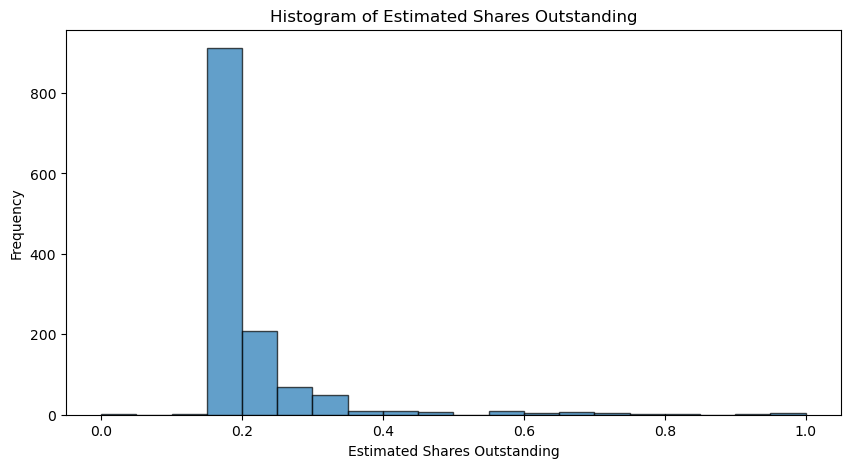

In [113]:
# Standardized Estimated Shares Outstanding
ESO = (fdm_df['Estimated Shares Outstanding'] - min(fdm_df['Estimated Shares Outstanding'])) / (max(fdm_df['Estimated Shares Outstanding']) - min(fdm_df['Estimated Shares Outstanding']))

# Histogram for Estimated Shares Outstanding
plt.figure(figsize=(10, 5))
plt.hist(ESO, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Estimated Shares Outstanding")
plt.xlabel("Estimated Shares Outstanding")
plt.ylabel("Frequency")
plt.show()


- Insight

The histogram of Estimated Shares Outstanding shows most of values distributes around 0.2(standardized values), and the overall distribution is right-skewed, meaning there is a long tail on the right side of the histogram. Most of the data points fall into the first few bins on the left side of the histogram, indicating that lower values are more common.

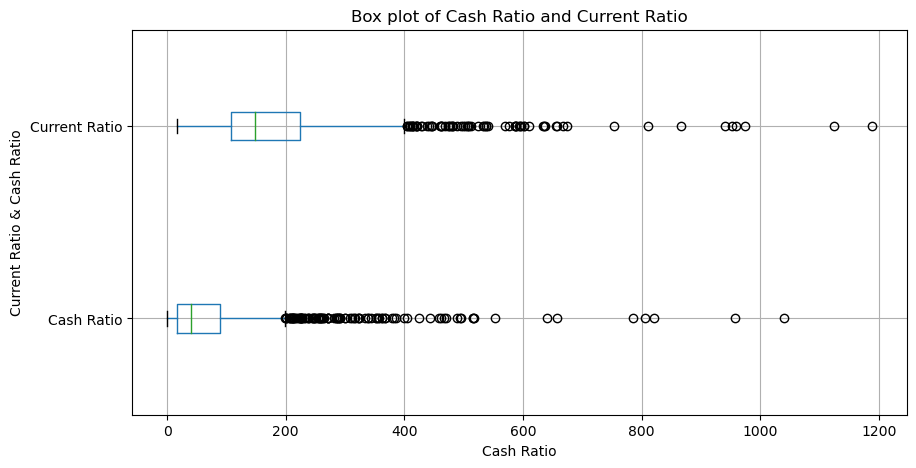

In [218]:
# Box plot for price based on make
plt.figure(figsize=(10, 5))
fdm_df.boxplot(column=['Cash Ratio','Current Ratio'],vert=False)
plt.title("Box plot of Cash Ratio and Current Ratio")
plt.xlabel("Cash Ratio")
plt.ylabel("Current Ratio & Cash Ratio")
plt.suptitle('')  # Suppress the default title to match the R output
plt.show()

- Insight

For both variables, the median (indicated by the line inside the box) is relatively low compared to the scale of the plot. This suggests that the central tendency of the 'Cash Ratio' is on the lower end of the scale. There are numerous outliers, as indicated by the dots outside the 'whiskers' of the box plots. These outliers suggest that while most of the data for 'Cash Ratio' fall within a smaller range, there are quite a few values that are significantly higher than the rest.

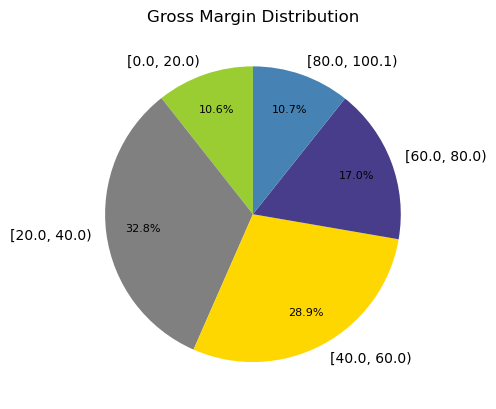

In [230]:
## Pie Chart for Gross Margin Distribution
bins = [0.0, 20.0, 40.0, 60.0, 80.0, 100.1] # set segment
segments = pd.cut(fdm_df['Gross Margin'], bins, right = False) # discretization of data by segment
# print(segments) 
counts = pd.value_counts(segments,sort = False ) # count the number of people in each section
# Draw pie chart1
colors = ['yellowgreen', 'Grey', 'Gold', 'DarkSlateBlue', 'steelblue'] # set color for each piece
distrpct1, l_text, p_text = plt.pie(counts,labels = counts.index.astype(str), autopct = '%1.1f%%', colors = colors, shadow = False, startangle = 90, pctdistance = 0.75)
for t in p_text: # change inside fontsize
    t.set_size(8)

for t in l_text: # change outside fontsize
    t.set_size(10)

plt.title('Gross Margin Distribution')
plt.show()

- Insight

The distribution is skewed toward the lower and middle ranges, with 71.7% of the entities having a gross margin less than 60%. The largest segment of the distribution falls within the [20.0, 40.0) range, constituting 32.8% of the data. This suggests that the most common gross margin percentage among the sampled entities lies between 20% to less than 40%.

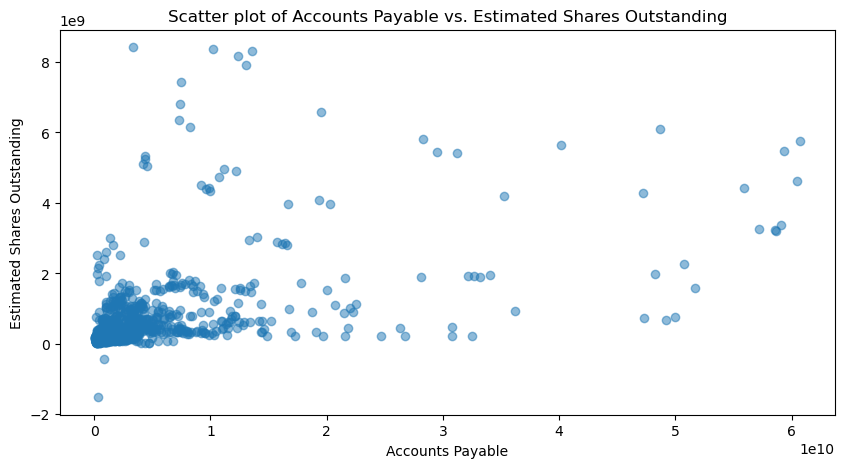

In [115]:
# Scatter plot for Accounts Payable vs. Estimated Shares Outstanding
plt.figure(figsize=(10, 5))
plt.scatter(fdm_df['Accounts Payable'], fdm_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Accounts Payable vs. Estimated Shares Outstanding")
plt.xlabel("Accounts Payable")
plt.ylabel("Estimated Shares Outstanding")
plt.show()

- Insight

There appears to be a positive correlation between Accounts Payable and Estimated Shares Outstanding. Generally, as Accounts Payable increases, Estimated Shares Outstanding also tends to increase. However, the relationship does not seem to be very strong or linear, as the points are quite dispersed.

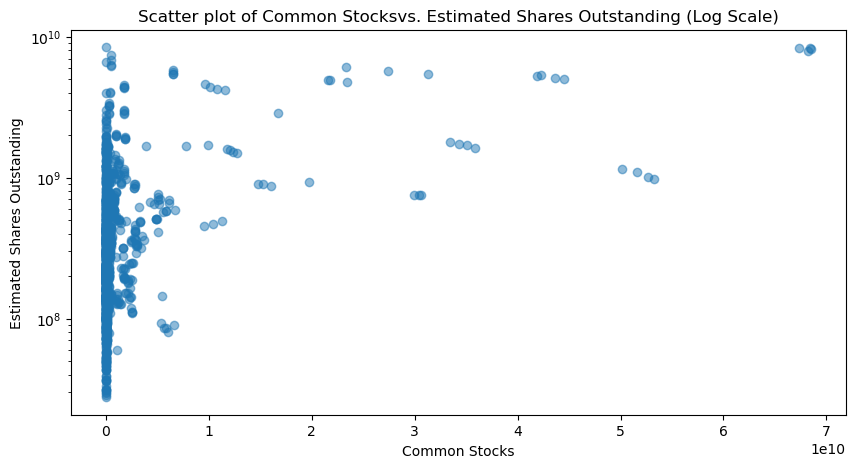

In [116]:
# Scatter plot for Common Stocks vs. Estimated Shares Outstanding
plt.figure(figsize=(10, 5))
plt.scatter(fdm_df['Common Stocks'], fdm_df['Estimated Shares Outstanding'], alpha=0.5)
plt.title("Scatter plot of Common Stocks vs. Estimated Shares Outstanding (Log Scale)")
plt.xlabel("Common Stocks")
plt.yscale('log')
plt.ylabel("Estimated Shares Outstanding")
plt.show()

- Insight

The majority of data points are clustered at the lower end of both axes, indicating that most entities have lower values for both variables. This trend suggests a potential positive correlation between the two financial metrics.


## 2. Linear Regression Model Development
#### Create linear regression to predict Estimated Shares Outstanding. Explain your model.

In [126]:
# Linear regression of Estimated Shares Outstanding

X = fdm_df.select_dtypes(include=[np.number]).drop(columns=['Estimated Shares Outstanding'])
X = sm.add_constant(X) 
X.head()
y = fdm_df['Estimated Shares Outstanding']
model1 = sm.OLS(y, X).fit() 

# Display the summary of the first regression model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                                  18:52:16   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                7.312e+08      1e+09      0.729      0.466   -1.24e+09     2.7e+09
Accounts Payable                                     -183.9454    238.959     -0.770      0.442    -652.760     284.869
Accounts Receivable                                    -0.0722      0.057     -1.274      0.203      -0.183       0.039
Add'l income/expense items                              0.0361      0.057      0.635      0.525      -0.075       0.148
After Tax ROE                                       -6.663e+05      5e+05     -1.332      0.183   -1.65e+06    3.15e+05
Capital Expenditures                                    0.9122      2.396      0.381      0.704      -3.789       5.614
Capital Surplus                                         0.0149      0.009      1.631      0.103      -0.003       0.033
Cash Ratio                                           6.866e+05   3.83e+05      1.793      0.073   -6.45e+04    1.44e+06
Cash and Cash Equivalents                              -1.2388      0.617     -2.008      0.045      -2.449      -0.029
Changes in Inventories                                 -0.0876      0.060     -1.456      0.146      -0.206       0.030
Common Stocks                                          -0.0014      0.010     -0.143      0.886      -0.020       0.018
Cost of Revenue                                       822.2045   1127.552      0.729      0.466   -1389.943    3034.352
Current Ratio                                       -2.044e+05   2.94e+05     -0.695      0.487   -7.82e+05    3.73e+05
Deferred Asset Charges                                 -0.0585      0.989     -0.059      0.953      -1.999       1.882
Deferred Liability Charges                              0.0094      0.099      0.095      0.925      -0.185       0.204
Depreciation                                           -0.0843      0.057     -1.488      0.137      -0.196       0.027
Earnings Before Interest and Tax                       22.5389     39.533      0.570      0.569     -55.022     100.100
Earnings Before Tax                                   -22.8602     39.533     -0.578      0.563    -100.420      54.699
Effect of Exchange Rate                                -0.0233      0.166     -0.141      0.888      -0.348       0.302
Equity Earnings/Loss Unconsolidated Subsidiary          0.1119      0.082      1.371      0.171      -0.048       0.272
Fixed Assets                                           -0.0572      0.989     -0.058      0.954      -1.998       1.883
Goodwill                                               -0.0642      0.989     -0.065      0.9

- The R-squared value is `0.854`, indicating that approximately 85.4% of the variance in the Estimated Shares Outstanding can be explained by the Accounts Payable, Accounts Receivable, Add'l income/expense items, and After Tax ROE, etc in the model.
- The p-values for the Cash and Cash Equivalents, Income Tax, Inventory, Misc. Stocks, Net Borrowings, Net Cash Flows-Financing, Net Receivables, Non-Recurring Items,  Operating Income, Operating Margin, Other Current Assets, Other Financing Activities, Pre-Tax Margin, Research and Development, Sale and Purchase of Stock and Short-Term Investments are statistically significant at the 0.05 level, suggesting these variables have a significant effect on the Estimated Shares Outstanding.
- The coefficients for Accounts Payable, Accounts Receivable, Add'l income/expense items, After Tax ROE and Capital Expenditures, etc are not statistically significant, implying that, with other variables held constant, these variables doesn't provide significant predictive power for the  Estimated Shares Outstanding in this model.

## 3. Multicollinearity in Linear Regression
###### Explain how multicollinearity can affect the interpretation of a linear regression model's coefficients.

(1) Unstable Coefficients: High correlation among independent variables can lead to fluctuating estimates in a regression model's coefficients. This fluctuation can cause the coefficients to have a wide range, indicating a lack of precision in their estimation.

(2) Inflated Standard Errors: Multicollinearity increases the standard errors of the coefficient estimates. High standard errors can cause the coefficients to be statistically insignificant when they should be significant.

(3) Difficulty in Identifying Important Variables: When predictor variables are highly correlated, it becomes difficult to ascertain the specific contribution of each variable to the outcome. Variables that cover similar information can obscure the distinct influence of each on the dependent variable.

## 4. P-Value Analysis and Histogram
###### Create a histogram of the p-values. Is there any skewedness? Provide your explanation.

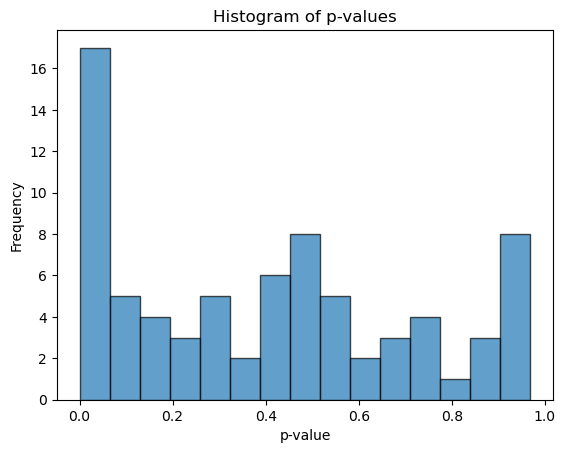

(0.5, 4.286778485666113e-18)

In [184]:
plt.hist(model1.pvalues, bins=15, edgecolor='black', alpha=0.7) # set the histrogram

# p_value = model1.pvalues
# p_value.hist()

# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histrogram

ks_statistic, ks_pvalue = kstest(model1.pvalues, 'norm')

ks_statistic, ks_pvalue

(1) We can see from the histogram of p-values, the graph shows a right-skewness.

(2) Conducted the Kolmogorov-Smirnov test to determine if the distribution of p-values is normally distributed:

    KS Statistic: 0.5

    p-value: 4.286778485666113e-18

The high p-value from the Kolmogorov-Smirnov test suggests that we can reject the null hypothesis that the p-values are normally distributed, suggesting a skewedness.

## 5. False Discovery Rate Control with BH Procedure
###### Given the p values you find, use the BH procedure to control the FDR with a q of 0.1. How many “true” discoveries do you estimate? 

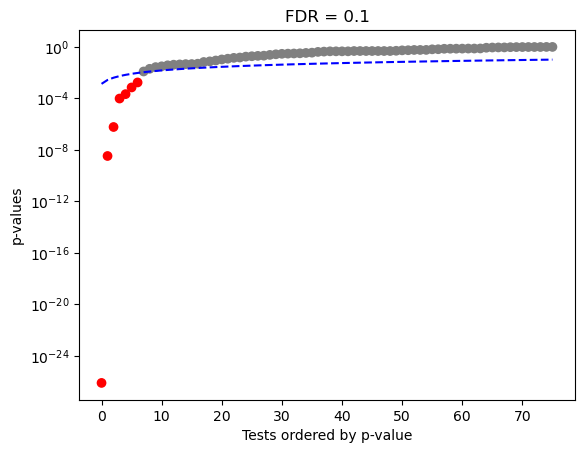

0.0016866310511582

In [187]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Rank the p-values
  k = np.argsort(pvals) + 1
  alpha = max(pvals[pvals <= q * k / N])
  
  # Optional plot
  if plotit:
    sig = pvals <= alpha
    plt.scatter(range(N), np.sort(pvals), c=np.where(sig, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), q * np.arange(1, N+1) / N, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha

alpha_threshold = fdr(model1.pvalues, 0.1, plotit=True)

# check the alpha_threshold
alpha_threshold


When q = 0.1, 0.17% of the observations that are estimated are “true” discoveries.

## 6. Sensitivity Analysis of FDR Control
###### If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables? 

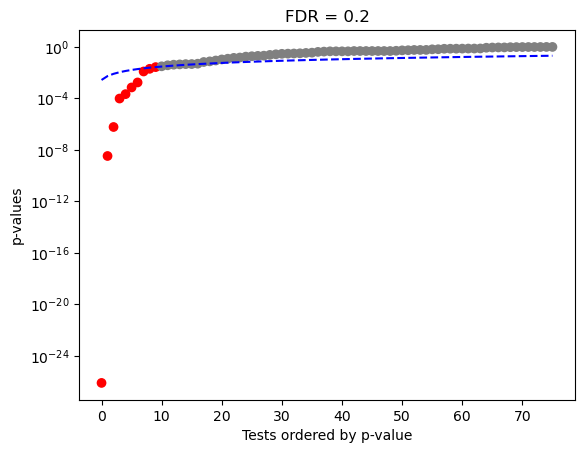

0.026230280578051383

In [196]:
# q = 0.2
alpha_threshold = fdr(model1.pvalues, 0.2, plotit=True)
alpha_threshold

When q = 0.2, the proportion of "true" discoveries changes to 2.62%.

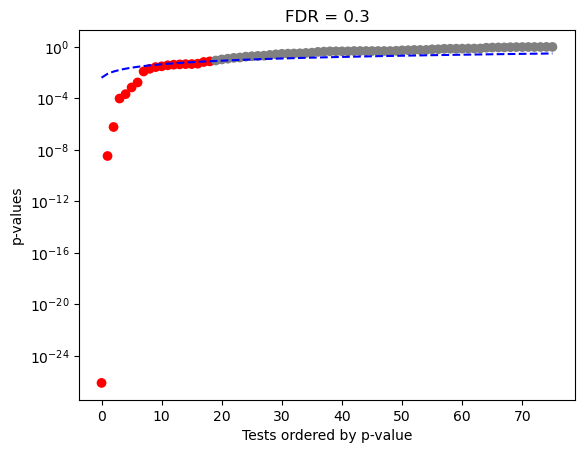

0.0731508235125983

In [197]:
# q = 0.3
alpha_threshold = fdr(model1.pvalues, 0.3, plotit=True)
alpha_threshold

When q = 0.3, the proportion of "true" discoveries changes to 7.32%.

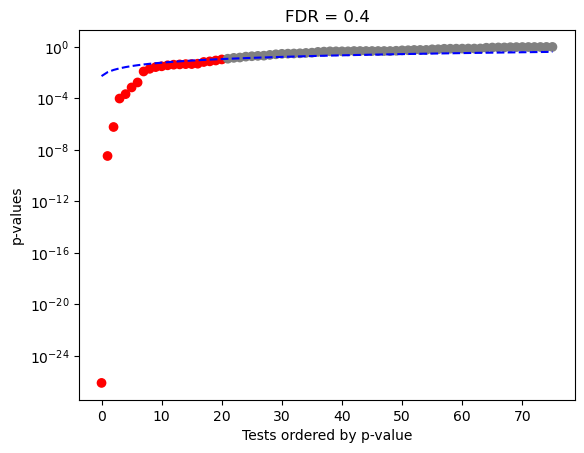

0.10319315134105302

In [198]:
# q = 0.4
alpha_threshold = fdr(model1.pvalues, 0.4, plotit=True)
alpha_threshold

When q = 0.4, the proportion of "true" discoveries changes to almost 10.32%.

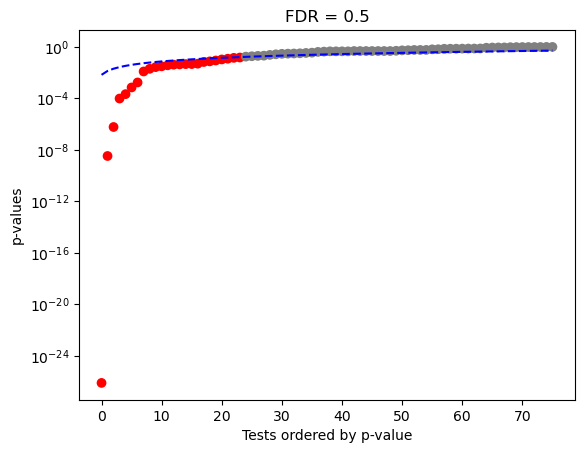

0.1456384344520619

In [199]:
# q = 0.5
alpha_threshold = fdr(model1.pvalues, 0.5, plotit=True)
alpha_threshold

When q = 0.5, the proportion of "true" discoveries changes to almost 14.56%.

We can see from the results of different q-values (from 0.1 to 0.5), the proportion of "true" discoveries changes from 0.17% to 14.56%, indicating a slightly low robustness.

## 7. Exploring Interaction Terms:

###### a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two). You should include both original predictors and their interaction terms in your model.

In [231]:
# Linear regression with interaction terms of Estimated Shares Outstanding
X = fdm_df.iloc[:, 2:27]
# Using PolynomialFeatures to create interaction terms corresponding to 25 variables
poly = PolynomialFeatures(interaction_only=True,include_bias = False) 
X = poly.fit_transform(X)
X = sm.add_constant(X)
y = fdm_df['Estimated Shares Outstanding']

model2 = sm.OLS(y, X).fit() 

# Display the summary of the Second regression model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.941
Model:                                      OLS   Adj. R-squared:                  0.923
Method:                           Least Squares   F-statistic:                     53.66
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  12:39:18   Log-Likelihood:                -26923.
No. Observations:                          1299   AIC:                         5.444e+04
Df Residuals:                              1002   BIC:                         5.598e+04
Df Model:                                   296                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      2.124      0.034    8.35e-05       0.002
x1            -0.1504      0.042     -3.571      0.000      -0.233      -0.068
x2            -0.0320      0.223     -0.143      0.886      -0.470       0.406
x3             0.1617      0.274      0.590      0.555      -0.376       0.699
x4            -0.0120      0.004     -2.837      0.005      -0.020      -0.004
x5             0.0586      0.093      0.631      0.528      -0.124       0.241
x6             0.0499      0.020      2.481      0.013       0.010       0.089
x7            -0.0020      0.001     -1.721      0.086      -0.004       0.000
x8            -0.0248      0.055     -0.452      0.652      -0.133       0.083
x9            -0.7365      0.332     -2.217      0.027      -1.389      -0.085
x10            0.0087      0.050      0.176      0.860      -0.089       0.106
x11           -0.0058      0.008     -0.733      0.463      -0.021       0.010
x12            0.0016      0.001      2.281      0.023       0.000       0.003
x13            0.0931      0.117      0.793      0.428      -0.137       0.323
x14           -0.1539      0.057     -2.710      0.007      -0.265      -0.042
x15            0.1679      0.144      1.164      0.245      -0.115       0.451
x16            1.3714      0.397      3.451      0.001       0.592       2.151
x17           -1.4556      0.407     -3.578      0.000      -2.254      -0.657
x18           -2.7389      1.074     -2.550      0.011      -4.846      -0.631
x19            1.1479      0.611      1.877      0.061      -0.052       2.348
x20            0.0199      0.016      1.218      0.223      -0.012       0.052
x21            0.0151      0.027      0.567      0.571      -0.037       0.067
x22           -0.0007      0.001     -1.237      0.216      -0.002       0.000
x23           -0.0028      0.079     -0.035      0.972      -0.159       0.153
x24            0.4617      0.299      1.543      0.123      -0.125       1.049
x25           -0.1303      0.044     -2.983      0.003      -0.216      -0.045
x26         1.487e-11   1.62e-11      0.915      0.360    -1.7e-11    4.67e-11
x27        -8.094e-12   3.33e-11     -0.243      0.808   -7.34e-11    5.72e-11
x28            0.0002      0.000      0.791      0.429      -0.000       0.001
x29          2.49e-11   1.56e-11      1.597      0.111   -5.71e-12    5.55e-11
x30          1.43e-12   3.29e-12      0.435      0.664   -5.02e-12    7.88e-12
x31        -8.323e-05      0.000     -0.209      0.834      -0.001       0.001
x32        -3.172e-13    3.1e-12     -0.102      0.918   -6.39e-12    5.76e-12
x33         -2.31e-11   1.05e-11     -2.201      0.028   -4.37e-11   -2.51e-12
x34        -5.705e-12   4.55e-12     -1.255      0

###### b. Briefly explain why interaction terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics.

Without interaction terms, there might be important aspects of the relationships between variables that are being missed, potentially leading to biased or incomplete conclusions about the factors influencing the number of estimated shares outstanding. Including interaction terms could potentially make the model more robust and insightful, capturing a more accurate representation of the underlying financial dynamics.

## 8. Model Evaluation with Interaction Terms:

###### c. Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics.

Model 1 (without interaction terms):

    R-squared: 0.854
    Adjusted R-squared: 0.846
    F-statistic: 98.40
    AIC: 5.516e+04
    BIC: 5.554e+04

Model 2 (with interaction terms):

    R-squared: 0.941
    Adjusted R-squared: 0.923
    F-statistic: 53.66
    AIC: 5.444e+04
    BIC: 5.598e+04

(1) R-squared: The OLS regression results of the model with interaction terms show a high R-squared value (0.941) compared to (0.854), suggesting a better fit to the data. It is suggested that interaction terms can be added into the model for better explaination.

(2) F-statistic: Despite Model 1 having a higher F-statistic, which generally indicates the statistical significance of the model, it's important to remember that the absolute size of the F-statistic is not as informative for model comparison as the p-value associated with it, which is 0.00 in both models, indicating that both models are statistically significant.

(3) AIC and BIC: Model 2 has lower AIC and BIC values, which suggest that it has a better balance between goodness of fit and model complexity, despite having more parameters due to interaction terms.


###### d. Discuss any significant changes in the model's performance or the coefficients of the predictors.

(1) The R-squared value is significantly higher in Model 2 (0.941) compared to Model 1 (0.854). This indicates that Model 1 with interaction terms explains more variability in the dependent variable.

(2) Coefficients in Model 2 is substantially different from those in Model 1 due to the interaction terms accounting for the combined effects of predictors, like the Accounts Payable becomes significantly influential.

## 9. FDR Analysis with Interaction Terms: 

###### a. Create a histogram of the p-values for the new model including interaction terms. Discuss any noticeable differences from the histogram you created for the original model.

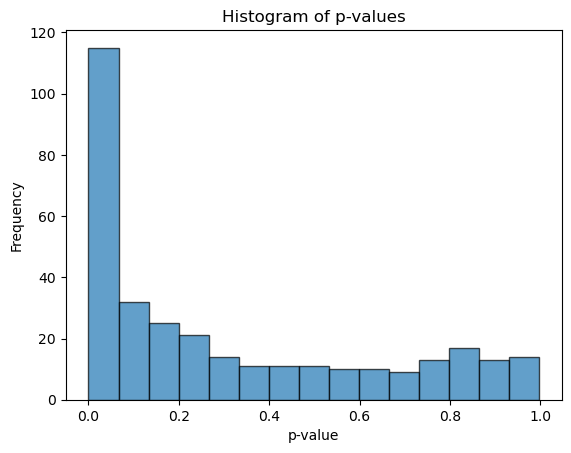

(0.500000000869075, 6.89423215863057e-76)

In [216]:
plt.hist(model2.pvalues, bins=15, edgecolor='black', alpha=0.7) # set the histrogram

# p_value = model1.pvalues
# p_value.hist()

# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histrogram

ks_statistic, ks_pvalue = kstest(model2.pvalues, 'norm')

ks_statistic, ks_pvalue

(1) In the histogram of Model 2, there is a high frequency of low p-values (indicating statistical significance), which quickly drops off as the p-value increases. This suggests that many of the predictors in the interaction model are statistically significant.

(2) The second histogram, associated with the model containing interaction terms, is closer to a right-skewed distribution of p-values, which is often an indicator that the predictors are significantly associated with the dependent variable.

###### b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate (FDR) with a q-value of 0.1. How many significant predictors are identified now, including both main effects and interaction effects?

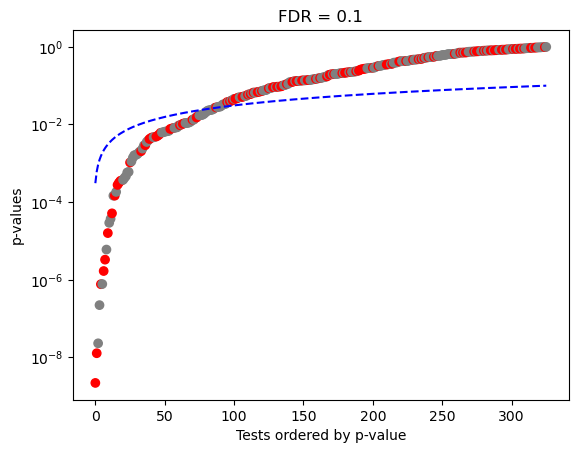

0.08755960303446715

In [217]:
alpha_threshold = fdr(model2.pvalues, 0.1, plotit=True)
alpha_threshold

We can see from the result, 8.76% of the observations are identified as significant predictors.

###### c. Compare these results with those obtained from the original model. Discuss the impact of including interaction terms on the number of discoveries and the control of the FDR.

Model 2( with interaction term) has a higher number of low p-values and we can identify more true positives while controlling the expected proportion of false positives. In conclusion, including interaction terms has the potential to reveal complex relationships that are not observable through main effects alone